# Binary Classification of IMDb Movie Reviews using Deep Learning 
## 1 Introduction 
### 1.1 Defining the problem
In the age of digital media and online platforms, understanding the sentiment expressed in user-generated content is crucial for various applications, ranging from market research to product feedback analysis. One such domain where sentiment analysis plays a vital role is the film industry, where the success of movies often hinges on audience reception and critical acclaim.

The objective of this project is to harness the power of deep learning techniques to perform sentiment analysis on movie reviews sourced from The Internet Movie Database (IMDb). Sentiment analysis, also known as opinion mining, involves computationally analysing and categorising the sentiments expressed in text data to discern whether the author holds a positive, negative, or neutral attitude towards the subject matter—in this case, movies.

This project revolves around building a predictive model capable of accurately classifying movie reviews as either positive or negative sentiment. Leveraging the principles of binary classification, we aim to develop a supervised learning algorithm that categorises new observations into one of two classes—positive or negative sentiment—based on the textual content of the reviews.

**The primary objective:**
To predict the sentiment polarity of movie reviews, thereby enabling the automatic identification of positive and negative opinions expressed by IMDb users. 

### 1.2 Assembling a dataset
The IMDb dataset is a widely used benchmark dataset in the field of natural language processing (NLP) and sentiment analysis. It comprises 50,000 movie reviews, divided evenly into training and testing sets, with 25,000 reviews each. Each review is preprocessed and encoded as sequences of integers, where each integer stands for a specific word in a dictionary. This dataset is particularly valuable for sentiment analysis tasks due to its balanced distribution of positive and negative reviews, ensuring that models are trained on a diverse range of sentiments. 

#### 1.2.1 Import libraries 

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import models, layers, Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas as pd

#### 1.2.2 Sample data 

In [5]:
# Load the dataset 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Data (input): ", train_data[0])
print("\nLabel (target): ", train_labels[0])

Data (input):  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

Label (target):  1


#### 1.2.3 Data and Target Overview 
**Input Data:**
- The input consists of reviews, where each review is represented as a sequence of word indices.
- To manage the size of the data effectively, we limit the vocabulary to the top 10,000 most frequently occurring words in the training data.

**Targets:**
- Each review is associated with a label, either 0 or 1, indicating negative or positive sentiment, respectively.

**Binary Classification Task:**
- Given the binary nature of the task, our goal is to predict whether a review expresses positive sentiment or negative sentiment.
- The model outputs a single probability score between 0 and 1 for each review, representing the likelihood of the positive sentiment class.


In [3]:
# Display dataset size
print("Training dataset size:", len(train_data))
print("Testing dataset size:", len(test_data))

# Calculate class distribution
train_positive = sum(train_labels)
train_negative = len(train_labels) - train_positive
test_positive = sum(test_labels)
test_negative = len(test_labels) - test_positive

# Display class distribution
print("\nTraining dataset class distribution:")
print("Positive sentiment:", train_positive)
print("Negative sentiment:", train_negative)

print("\nTesting dataset class distribution:")
print("Positive sentiment:", test_positive)
print("Negative sentiment:", test_negative)

Training dataset size: 25000
Testing dataset size: 25000

Training dataset class distribution:
Positive sentiment: 12500
Negative sentiment: 12500

Testing dataset class distribution:
Positive sentiment: 12500
Negative sentiment: 12500


## 2 Evaluation metric 
The evaluation metric chosen will decide on how we measure the success of the model. We can evaluate the performance of the model based on this measure, which is dependant on the problem we are trying to solve and the distribution of the data. This metric will also guide the choice of what the model will optimise through a loss function. 
### 2.1 Addressing the problem 
In this case, the challenge of this model is to predict how likely it is for a review to express a positive or negative sentiment. In the context of a confusion matrix, a false positive would be a negative review predicted to be positive and a false negative would be a positive review predicted to be negative. Both instances in the context of the problem bear similar weight as the focus is on predicting the right sentiment of the review (Neither bears more cost or is more beneficial). 
### 2.2 Accuracy 
Therefore, the most applicable metric in this situation would be accuracy, defined as the ratio of the number of true predictions to the number of total samples in the set.
Considering we have a balanced dataset, with both classes represented equally, accuracy would be an effective metric as an imbalance can skew the probabilistic output and render the metric misleading. 

## 3 Evaluation Protocol
- Reserving a portion of the labeled data for **validation** allows the tuning of hyperparameters to find the optimal model performance.
- A **test** dataset will have to be set aside to assess the model on how it generalises to unseen data since the model has been adjusted using the validation dataset and can no longer be used provide an unbiased evaluation of performance.
- Only the remaining data can be used for **training** to avoid overfitting. 

### 3.1 Maintaining a hold-out validation set 
The efficacy of this method mainly hinges on:
- Data size:
    - As a general starting point, at least half of the data should be used for training so this method is good to use when a large dataset is available, and to build an initial model.
    - As claimed by Goodfellow, Bengio and Courville in their deep learning book: 5,000 labeled examples per category is enough for a supervised deep learning algorithm to achieve acceptable performance which will match human performance.
- Data distribution:
    - Simple hold out is sensitive to what data ends up in each bin - which is not ideal to create a robust model if there is high variance in the distribution of data.

Considering the large dataset size, even distribution of data and the recommendation of having at least 5,000 labeled examples per category for supervised deep learning, a reasonable split ratio for the hold-out method could be 60% for training, 20% for validation, and 20% for testing. We will use this to train the initial model.

## 4 Model Architecture and Performance Framework
### 4.1 Data Preparation
#### 4.1.1 Vectorise the data 
- The data sequences (lists of integers) cannot be fed into a neural network. They will have to be turned into tensors
- Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape.
- Therefore, we need to one-hot-encode the feature data as following: 
    - Vectorisation:
        - Lists will be one-hot encoded into vectors of 0s and 1s (i.e., the sequence [3, 5] is turned into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s).
        - This will format the feature data into simple vector data, stored in 2D tensors of shape (samples, features)
        - Will enable the use of dense layers that can be used as the first layer in our network, capable of handling floating-point vector data.
    - Value normalisation: 
        - One-hot encoding restricts values to a small range (0,1) and homogenises feature data 

In [6]:
# Dataset loaded as: (train_data, train_labels), (test_data, test_labels)

# Encoding the integer sequences into a binary matrix
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.            # Sets specific indices of results[i] to 1s
    return results

train_data_v = vectorise_sequences(train_data)  # Vectorised training data
test_data_v = vectorise_sequences(test_data)    # Vectorised test data

# Vectorise labels 
train_labels_v = np.asarray(train_labels).astype('float32')
test_labels_v = np.asarray(test_labels).astype('float32')

print("train_data_v:", train_data_v.shape)
print("train_labels_v:", train_labels_v.shape)
print("test_data_v:", test_data_v.shape)
print("test_labels_v:", test_labels_v.shape)

train_data_v: (25000, 10000)
train_labels_v: (25000,)
test_data_v: (25000, 10000)
test_labels_v: (25000,)


#### 4.1.2 Train-Validation-Test split 
- Split the data as per the ratio mentioned in 3.1 - (3 : 1 : 1)
- Data is randomly shuffled (using train_test_split) to ensure each set is representative of the data at hand

In [7]:
# Combine train,test data and train,test labels ==> X,y 
X = np.concatenate([train_data_v, test_data_v])
y = np.concatenate([train_labels_v, test_labels_v])

print("Data:", X.shape, "Labels:", y.shape)

# Splitting data into training (60%) and remaining (40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Further splitting remaining data equally into validation (20%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("\nTraining: 60%")
print("imdb_train_data", X_train.shape)
print("imdb_train_labels", y_train.shape)
print("\nValidation: 20%")
print("imdb_val_data", X_val.shape)
print("imdb_val_labels", y_val.shape)
print("\nTesting: 20%")
print("imdb_test_data", X_test.shape)
print("imdb_test_labels", y_test.shape)

Data: (50000, 10000) Labels: (50000,)

Training: 60%
imdb_train_data (30000, 10000)
imdb_train_labels (30000,)

Validation: 20%
imdb_val_data (10000, 10000)
imdb_val_labels (10000,)

Testing: 20%
imdb_test_data (10000, 10000)
imdb_test_labels (10000,)


### 4.2 Common-Sense Baseline 
#### Baseline Model
In order to truly gauge the predictive capabilities of the models we are about to build, we cannot solely rely on metrics such as accuracy or loss to evaluate performance. Without sufficient context, it would be difficult to interprit those metrics and determine if the model achieves its purpose, based on the problem we are trying to solve. Thus, we require a baseline model to address this challenge:
- A baseline model is a simple model that acts as a reference in a machine learning project. Its main function is to contextualise the results of trained models.
- Baseline models serve as benchmarks for trained models and can provide information to dictate the future steps in the project.

#### Naive baseline 
In the case of this binary classification task with a balanced dataset, we can intuitively ascertain that the naive baseline for this task would be a probability of 50%. 
- The probability of a review being positive 
    - = positive reviews / total reviews 
    - = (12500 + 12500) / 50000
    - = **0.5**

### 4.3 Optimizing Performance
#### 4.3.1 Optimization vs. Generalization
Optimization involves fine-tuning a model to achieve its best performance on the training data, while generalization assesses how well the model performs on new, unseen data. Ultimately, a model aims to effectively predict patterns in unseen data by learning from the patterns present in the training data. This is accomplished by simultaneously monitoring loss and evaluation metrics [accuracy] on both the training and validation data by plotting accuracy and loss curves.
- Optimization: **Loss**
    - Loss measures the alignment between the model's predictions and the actual labels for each training example. It's a crucial metric during model training, as it quantifies the model's performance.
    - Minimizing the loss function is the primary goal during training, as it serves as the optimization objective, guiding the model's parameter adjustments.
- Generalization : **Accuracy**
    - Accuracy evaluates the overall performance of the model on a dataset, often distinct from the training set. It provides an indication of how well the model generalizes to new, unseen data.
    - Becomes more important post-training, in assessing the model's ability to generalize to unseen data and comparing its effectiveness in real-world scenarios.

#### 4.3.2 Training and Validation with Loss and Accuracy 
##### Training Loss and Accuracy:
- Indicate how well the model is learning from the training data.
- Decrease in training loss indicates that the model is improving in minimizing the error during training.
- Increase in training accuracy indicates that the model is making more correct predictions on the training data.

##### Validation Loss and Accuracy:
- Indicate how well the model is generalizing to unseen data. By evaluating the model's performance on a separate validation set, we can assess its ability to generalize beyond the training data.
- A decrease in validation loss and an increase in validation accuracy suggest that the model is learning meaningful patterns from the data and is not overfitting.
  
By monitoring both, we can identify the following scenarios:
##### Performance benchmarks: 
- **Underfitting**: When both training and validation loss are high, it indicates that the model is not capturing enough information from the data. In this case, we may need to increase the model's complexity or adjust hyperparameters.
- **Overfitting**: When training loss decreases significantly while validation loss increases or remains high, it suggests that the model is overfitting the training data. In this case, we may need to apply regularization techniques or reduce model complexity to improve generalization.
- **Optimal Performance**: When both training and validation loss decrease gradually, and both training and validation accuracy increase, it suggests that the model is learning meaningful patterns from the data and generalizing well to unseen data, indicating optimal performance.

#### 4.3.3 Plot Loss and Accuracy Curves
In order to use this feedback on the model's performance to guide the fine-tuning process, we shall plot accuracy and loss graphs using this function:

In [8]:
# Plot Loss curves 
def plot_loss(loss, val_loss): 
    '''Plot Training and Validation Loss
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    '''
    plt.clf() # Clear current figure
    epochs = range(1, len(loss) + 1) # Num epochs 

    # Plot values per curve 
    plt.plot(epochs, loss, 'bo', label='Training loss')           
    plt.plot(epochs, val_loss, 'b', label='Validation loss') 

    # Title and Axes 
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot Accuracy curves 
def plot_accuracy(acc, val_acc):
    '''Plot Training and Validation Accuracy
    history_dict = history.history
    acc = history_dict['acc']
    val_lacc = history_dict['val_acc']
    '''
    plt.clf() # Clear current figure
    epochs = range(1, len(acc) + 1) # Num epochs      
        
    # Plot values per curve 
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

    # Title and Axes 
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()    
    
def plot_results(loss, val_loss, accuracy, val_accuracy):
    plot_loss(loss, val_loss)
    plot_accuracy(accuracy, val_accuracy)


#### 4.3.2 Optimizer
- The optimizer determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent.
- The Adam optimizer is chosen for this project due to its adaptive learning rate mechanism, which adjusts learning rates for each parameter based on recent gradients and variances. It offers efficient convergence, robustness to hyperparameters, and widespread adoption in deep learning frameworks like TensorFlow and PyTorch. Overall, Adam's adaptability and efficiency would make it an effective choice for optimizing neural network models in this project.

## 5 Build Baseline Model 
### 5.1 Architecture
Our input data is vectors that need to be mapped to scalar labels (0s and 1s). 
This can be achieved with a stack of fully-connected, Dense layers where we have:
- final layer with sigmoid activation
    - squashes the output scores to the range [0, 1], allowing them to be interpreted as probabilities.

#### 5.1.1 Configuration
With this model we will aim for the minimum requirements for statistical power, which is the smallest model that beats the common-sense baseline of 0.5.

- Output layer with sigmoid activation 
- Loss function: 'binary_crossentropy'
  - preferred loss function for binary classification problems
- Optimization configuration: Adam Optimizer, default learning rate.
- Evaluation metric: accuracy 
- Evaluation protocol: Hold-out
  
### 5.2 Training
- 10 epochs
- Batch size: 512

In [24]:
# Define base_model
base_model = models.Sequential()

# Add the Input layer to model
# with shape to match 10,000-dimensional input vectors
base_model.add(Input(shape=(10000,)))

# Add the output layer for binary classification
base_model.add(layers.Dense(1, activation='sigmoid'))

# compile model
base_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
base_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │        10,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,001 (39.07 KB)

 Trainable params: 10,001 (39.07 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# train base_model
base_results = base_model.fit(X_train, y_train,
                              epochs=10, batch_size=512,
                              validation_data=(X_val, y_val))

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6946 - loss: 0.6342 - val_accuracy: 0.8399 - val_loss: 0.5097
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.4819 - val_accuracy: 0.8628 - val_loss: 0.4330
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.4090 - val_accuracy: 0.8740 - val_loss: 0.3892
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8873 - loss: 0.3655 - val_accuracy: 0.8814 - val_loss: 0.3606
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8944 - loss: 0.3342 - val_accuracy: 0.8848 - val_loss: 0.3407
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.3111 - val_accuracy: 0.8872 - val_loss: 0.3260
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9121 - loss: 0.2904 - val_accuracy: 0.8884 - val_loss: 0.3147
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.2800 - val_accuracy: 0.8896 - val_loss:

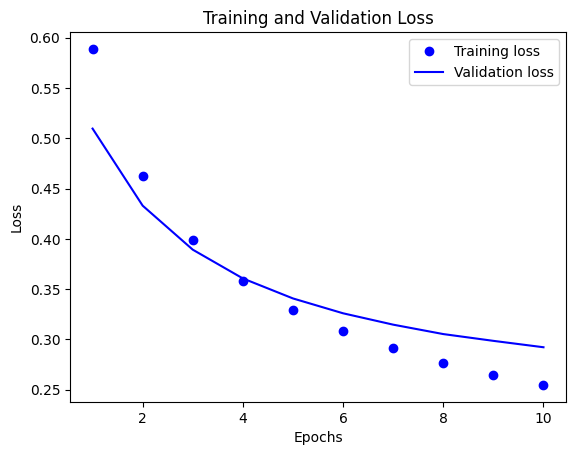

In [26]:
plot_loss(base_results.history['loss'], base_results.history['val_loss'])

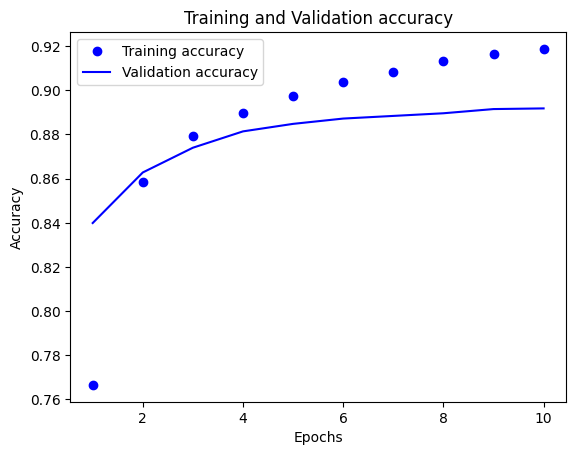

In [27]:
plot_accuracy(base_results.history['accuracy'], base_results.history['val_accuracy'])

In [29]:
test_loss, test_acc = base_model.evaluate(X_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8906 - loss: 0.2941


#### 5.2.1 Evaluation 
- The model has performed sufficiently for statistical power with a validation accuracy ('test_acc') of 89.06% that beats the baseline of 50%.
- Underfitting: 
    - Training loss is decreasing and continues to decrease at the end of the plot
    - shows that model is capable of further learning and improvements

## 6 Scaling up 
### 6.1 Developing a Model that Overfits 
In the pursuit of optimal performance, the next step is to scale up to an overfitting model to verify that there is sufficient power to capture more complex patterns in the data. The goal is to push the model's capacity to learn until it starts to overfit the training data. The point of at which the model's performance on validation data starts degrading while training improves will indicate overfitting. 

Assessing the midpoint between overfitting and underfitting will enable us to tune model and training parameters to find the right balance between optimisation and generalisation.
### 6.2 Architecture 
This model will require more capacity and tools to improve learning. We can achieve this by adding more layers, making layers bigger (more hidden units) and training for more epochs as such:
- First intermediate layer with relu activation and 16 hidden units
- Second intermediate layer with relu activation and 8 hidden units
    - relu activation function zeroes out negative values and expands hypothesis space by enabling multiple layers of representation through non-linearity
    - more hidden units provide a higher-dimensional representation space which allows the network to learn more complex representations
- Final output layer with sigmoid activation

### 6.3 Training
- 15 Epochs
    - More epochs  
- Batch size: 512

In [34]:
# Define overfit_model
overfit_model = models.Sequential()

# Add the Input layer to model
overfit_model.add(Input(shape=(10000,)))

# Adding 2 intermediate layers 
overfit_model.add(layers.Dense(16, activation='relu'))
overfit_model.add(layers.Dense(8, activation='relu'))

# Final output layer 
overfit_model.add(layers.Dense(1, activation='sigmoid'))

# compile model1
overfit_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
overfit_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,161 (625.63 KB)

 Trainable params: 160,161 (625.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train overfit_model 
overfit_results = overfit_model.fit(X_train, y_train,            
                                    epochs=15, batch_size=512,
                                    validation_data=(X_val, y_val))

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7509 - loss: 0.5476 - val_accuracy: 0.8902 - val_loss: 0.2878
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9162 - loss: 0.2351 - val_accuracy: 0.8988 - val_loss: 0.2616
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9385 - loss: 0.1765 - val_accuracy: 0.8965 - val_loss: 0.2725
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9517 - loss: 0.1398 - val_accuracy: 0.8895 - val_loss: 0.2973
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9598 - loss: 0.1211 - val_accuracy: 0.8870 - val_loss: 0.3227
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9661 - loss: 0.1046 - val_accuracy: 0.8864 - val_loss: 0.3519
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9722 - loss: 0.0884 - val_accuracy: 0.8800 - val_loss: 0.3851
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9803 - loss: 0.0743 - val_accuracy: 0.8748 - val_loss

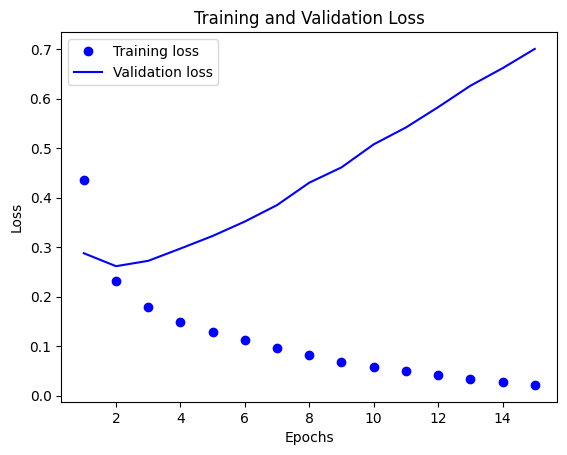

In [36]:
plot_loss(overfit_results.history['loss'], overfit_results.history['val_loss'])

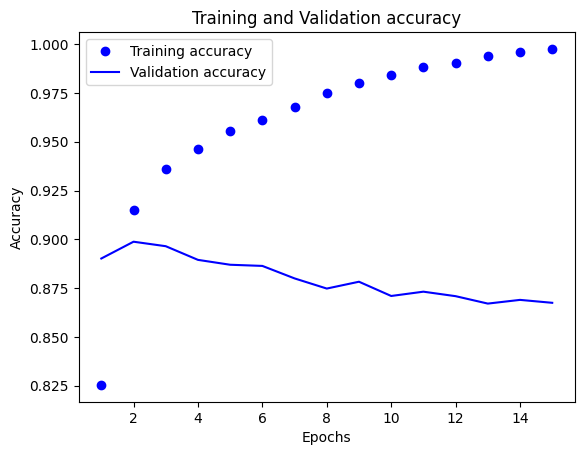

In [37]:
plot_accuracy(overfit_results.history['accuracy'], overfit_results.history['val_accuracy'])

In [38]:
test_loss, test_acc = overfit_model.evaluate(X_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8623 - loss: 0.7283


#### 6.3.1 Evaluation 
- Accuracy of the overfit model has decreased to 86.23% from 89.06% of the baseline model, reflecting that it is not generalising well to unseen data
    - This is evident in the decline of the validation accuracy curve as well  
- Overfitting is clearly exemplified by the disparity between validation loss and training loss
    - The model has been overtrained as validation loss and accuracy reach their peak at about epoch 2 before their steady decline
- Training loss still does not seem to have reached a steady state showing that learning can be improved as well.
  
## 7 Regularisation and tuning hyperparameters 
In order to improve training performance as well as generalisation (optimum learning and accuracy curves), a middle ground has to be found between the 2 network architectures above. Regularisation options that can be considered:
- Simplify the network and reduce its complexity to mitigate overfitting
- Regularisation techniques such as Dropout and L1/L2 weight regularisation

### 7.1 Simplify Network Architecture

In [106]:
m_21 = models.Sequential()
m_21.add(Input(shape=(10000,)))

# 1 intermediate layer 
m_21.add(layers.Dense(4, activation='relu'))

# Output layer 
m_21.add(layers.Dense(1, activation='sigmoid'))

# compile 
m_21.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
m_21.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,009 (156.29 KB)

 Trainable params: 40,009 (156.29 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# train 
m_21_results = m_21.fit(X_train, y_train,
                  epochs=20, batch_size=512,
                  validation_data=(X_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6969 - loss: 0.5972 - val_accuracy: 0.8684 - val_loss: 0.3981
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8845 - loss: 0.3543 - val_accuracy: 0.8886 - val_loss: 0.3200
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9071 - loss: 0.2822 - val_accuracy: 0.8936 - val_loss: 0.2889
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9192 - loss: 0.2413 - val_accuracy: 0.8971 - val_loss: 0.2725
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9298 - loss: 0.2118 - val_accuracy: 0.8989 - val_loss: 0.2653
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9349 - loss: 0.1951 - val_accuracy: 0.8993 - val_loss: 0.2626
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9424 - loss: 0.1772 - val_accuracy: 0.8983 - val_loss: 0.2631
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9444 - loss: 0.1683 - val_accuracy: 0.8948 - val_loss

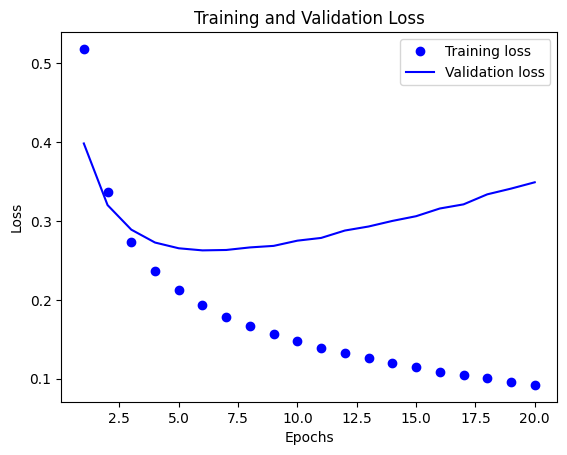

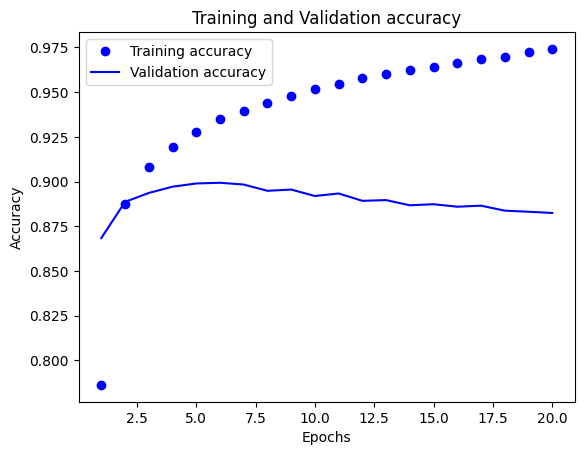

In [108]:
loss, val_loss, accuracy, val_accuracy = (m_21_results.history['loss'], m_21_results.history['val_loss'], 
                                          m_21_results.history['accuracy'], m_21_results.history['val_accuracy'])
plot_results(loss, val_loss, accuracy, val_accuracy)

In [109]:
test_loss, test_acc = m_21.evaluate(X_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8808 - loss: 0.3594


#### 7.1.1 Evaluation
- After testing many iterations of network architectures (See 9.3 Annex), I have settled on this one as it encompasses a balance of:
    - Good performance with high accuracy and low loss
    - Training and validation curves reflective of a stable learning process (smoothness) and a clear yet gradual divergence of training and validation loss and accuracy as expected
        - validation does not stagnate and degrades as expected while training improves  

### 7.2 Add Dropout (0.5)

In [123]:
d5_model = models.Sequential()
d5_model.add(Input(shape=(10000,)))

d5_model.add(layers.Dense(4, activation='relu'))
d5_model.add(layers.Dropout(0.5))
d5_model.add(layers.Dense(1, activation='sigmoid'))

# compile 
d5_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
d5_model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,009 (156.29 KB)

 Trainable params: 40,009 (156.29 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
# train 
d5_results = d5_model.fit(X_train, y_train,
                  epochs=20, batch_size=512,
                  validation_data=(X_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5948 - loss: 0.6574 - val_accuracy: 0.8585 - val_loss: 0.5145
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.5207 - val_accuracy: 0.8855 - val_loss: 0.3915
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.4289 - val_accuracy: 0.8926 - val_loss: 0.3381
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7960 - loss: 0.3875 - val_accuracy: 0.8955 - val_loss: 0.3096
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8069 - loss: 0.3639 - val_accuracy: 0.8991 - val_loss: 0.2929
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8083 - loss: 0.3499 - val_accuracy: 0.8968 - val_loss: 0.2827
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8176 - loss: 0.3334 - val_accuracy: 0.8984 - val_loss: 0.2764
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8188 - loss: 0.3241 - val_accuracy: 0.8992 - val_loss:

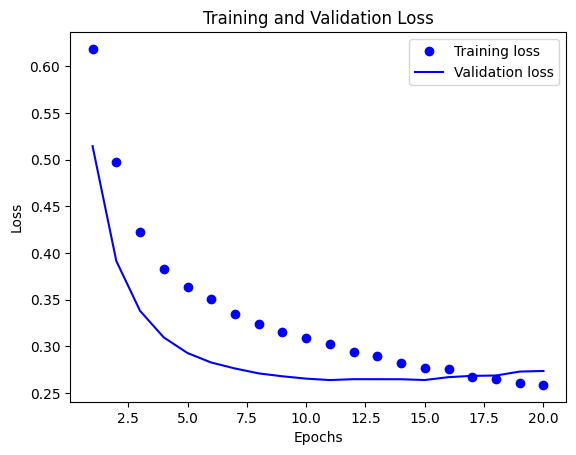

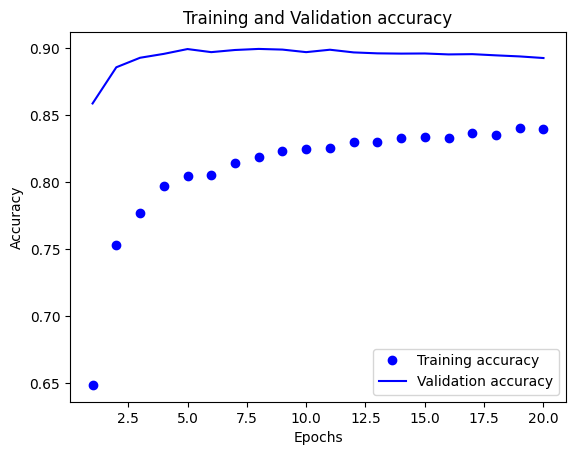

In [125]:
loss, val_loss, accuracy, val_accuracy = (d5_results.history['loss'], d5_results.history['val_loss'], 
                                          d5_results.history['accuracy'], d5_results.history['val_accuracy'])
plot_results(loss, val_loss, accuracy, val_accuracy)

In [126]:
test_loss, test_acc = d5_model.evaluate(X_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8912 - loss: 0.2814


#### 7.2.1 Evaluation
- This model shows better results than baseline model with (accuracy: 0.8623 - loss: 0.7283).
- The training and validation curves do not reflect usual training patterns. However, this happens when Dropout is used, since the behaviour when training and testing are different.
    - When training, a percentage of the features are set to zero (50% in this case we are using Dropout(0.5)). When testing, all features are used (and are scaled appropriately). So the model at test time is more robust - and can lead to higher testing accuracies.

### 7.3 Adding L2 Weight Regularization

In [129]:
reg_l2l1 = models.Sequential()
reg_l2l1.add(Input(shape=(10000,)))

reg_l2l1.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_l2l1.add(layers.Dense(1, activation='sigmoid'))

# compile 
reg_l2l1.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
reg_l2l1.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,009 (156.29 KB)

 Trainable params: 40,009 (156.29 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# train 
reg_l2l1_results = reg_l2l1.fit(X_train, y_train,
                  epochs=20, batch_size=512,
                  validation_data=(X_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6941 - loss: 0.6217 - val_accuracy: 0.8669 - val_loss: 0.4171
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.3837 - val_accuracy: 0.8837 - val_loss: 0.3513
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9057 - loss: 0.3157 - val_accuracy: 0.8908 - val_loss: 0.3256
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9148 - loss: 0.2867 - val_accuracy: 0.8921 - val_loss: 0.3159
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9208 - loss: 0.2709 - val_accuracy: 0.8922 - val_loss: 0.3123
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.2568 - val_accuracy: 0.8956 - val_loss: 0.3083
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9302 - loss: 0.2492 - val_accuracy: 0.8942 - val_loss: 0.3098
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.2466 - val_accuracy: 0.8960 - val_loss

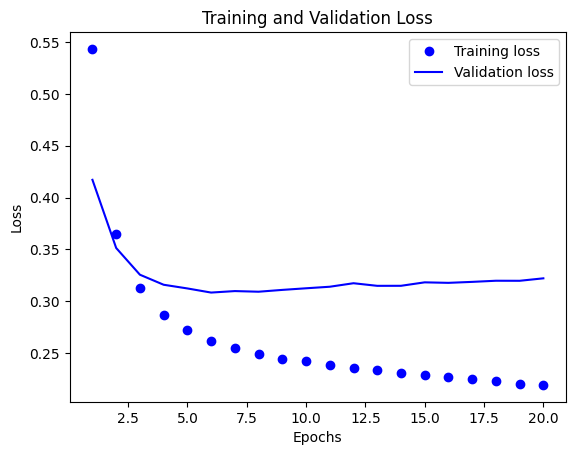

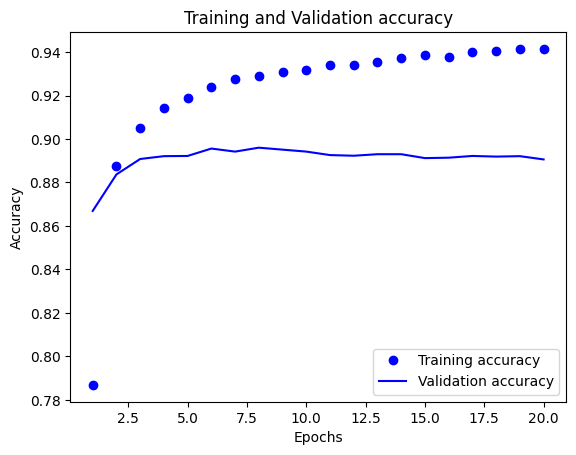

In [131]:
loss, val_loss, accuracy, val_accuracy = (reg_l2l1_results.history['loss'], reg_l2l1_results.history['val_loss'], 
                                          reg_l2l1_results.history['accuracy'], reg_l2l1_results.history['val_accuracy'])
plot_results(loss, val_loss, accuracy, val_accuracy)

In [132]:
test_loss, test_acc = reg_l2l1.evaluate(X_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8889 - loss: 0.3280


#### 7.3.1 Evaluation
Here we have slighly lower performance than the dropout model (accuracy: 0.8912 - loss: 0.2814) but higher than the previous model (0.8808 - loss: 0.3594). 

### 7.4 Combine models 
- Dropout:
- L2 Regularization

In [133]:
comb_m = models.Sequential()
comb_m.add(Input(shape=(10000,)))

comb_m.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
comb_m.add(layers.Dropout(0.5))
comb_m.add(layers.Dense(1, activation='sigmoid'))

# compile 
comb_m.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
comb_m.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,009 (156.29 KB)

 Trainable params: 40,009 (156.29 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# train 
comb_m_results = comb_m.fit(X_train, y_train,
                  epochs=20, batch_size=512,
                  validation_data=(X_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5553 - loss: 0.6709 - val_accuracy: 0.7782 - val_loss: 0.5607
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7901 - loss: 0.5572 - val_accuracy: 0.8367 - val_loss: 0.5105
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.5115 - val_accuracy: 0.8748 - val_loss: 0.4869
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8660 - loss: 0.4903 - val_accuracy: 0.8669 - val_loss: 0.4688
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8807 - loss: 0.4693 - val_accuracy: 0.8764 - val_loss: 0.4551
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8835 - loss: 0.4582 - val_accuracy: 0.8815 - val_loss: 0.4447
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8921 - loss: 0.4432 - val_accuracy: 0.8892 - val_loss: 0.4347
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8909 - loss: 0.4367 - val_accuracy: 0.8891 - val_loss

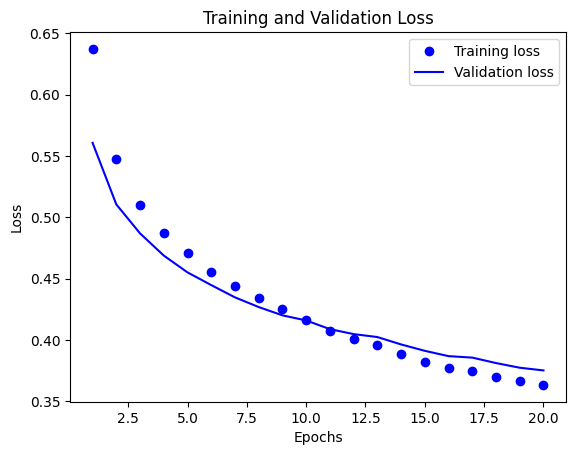

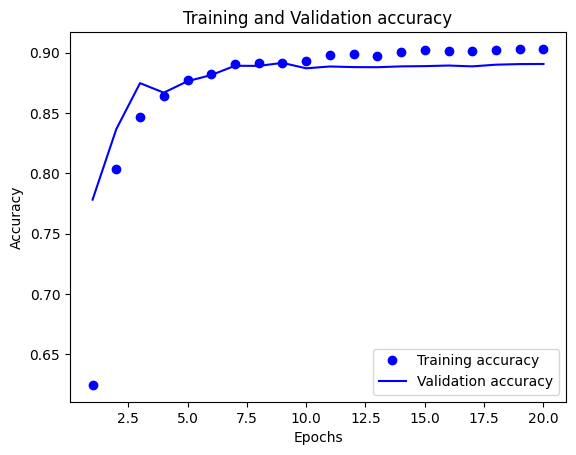

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8881 - loss: 0.3788


In [135]:
loss, val_loss, accuracy, val_accuracy = (comb_m_results.history['loss'], comb_m_results.history['val_loss'], 
                                          comb_m_results.history['accuracy'], comb_m_results.history['val_accuracy'])
plot_results(loss, val_loss, accuracy, val_accuracy)

test_loss, test_acc = comb_m.evaluate(X_val, y_val)

#### 7.4.1 Evaluation
Although performance may not be as good as previous models, the validation and accuracy curves show promise for generalisation.
- As mentioned earlier Dropout could be reflecting varied behaviour at testing as at test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time
- In addition, L2 Regularization penalty is only added at training time, thus the loss for this network will be much higher at training than at test time.

## 8 Retraining and Testing 
### 8.1 Final model 
#### 8.1.1 K-fold Cross Validation
To determine the final model, we will retrain a new network with the optimal number of epochs to prevent overfitting. This is to make sure the model is not overoptimizing on the training data to end up learning representations that are specific to the training data, thus not generalizing to data outside of the training set.

To determine the optimal number of epochs and prevent overfitting, we will retrain the model using a different validation method, k-fold cross-validation. In k-fold cross-validation, the training data is split into k subsets, or folds, and the model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set. This process allows us to assess the model's performance across different subsets of the data and helps in finding the optimal number of epochs.

After performing k-fold cross-validation, we will plot accuracy curves for each fold, showing the training and validation accuracy as a function of the number of epochs. By analyzing these curves, we can identify the point where the validation accuracy starts to degrade, indicating that the model is overfitting. We will then select the number of epochs just before this point as the optimal number of epochs for training the final model.

Once we have determined the optimal number of epochs, we will retrain the model on the entire training data using this number of epochs. This ensures that the final model is trained on the maximum amount of data while still preventing overfitting.

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6031 - loss: 0.6577 - val_accuracy: 0.8500 - val_loss: 0.4933
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.5071 - val_accuracy: 0.8783 - val_loss: 0.4226
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.4560 - val_accuracy: 0.8868 - val_loss: 0.3851
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.4302 - val_accuracy: 0.8925 - val_loss: 0.3688
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8387 - loss: 0.4184 - val_accuracy: 0.8878 - val_loss: 0.3595
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8495 - loss: 0.3996 - val_accuracy: 0.8938 - val_loss: 0.3481
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8602 - loss: 0.3888 - val_accuracy: 0.8935 - val_loss: 0.3486
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8686 - loss: 0.3819 - val_accuracy: 0.8943 - val_loss

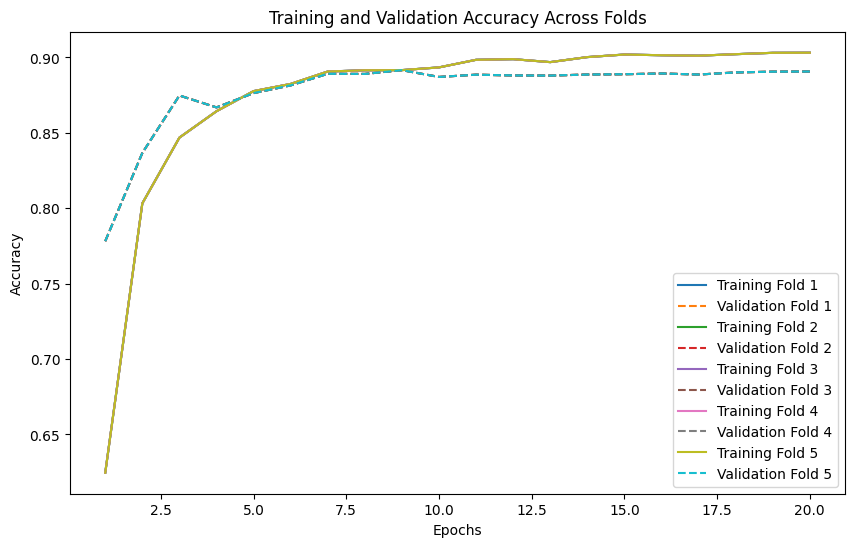

In [137]:
# Concatenate training and validation data for k-fold cross-validation
X_train_val = np.concatenate([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# Number of splits for k-fold cross-validation
k = 5
kf = KFold(n_splits=k)

# Lists to store accuracy data for each fold
train_accs = []
val_accs = []

# Iterate over each fold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Define and compile model
    model_val = models.Sequential()
    model_val.add(Input(shape=(10000,)))
    model_val.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_val.add(layers.Dropout(0.5))
    model_val.add(layers.Dense(1, activation='sigmoid'))
    model_val.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model on current fold
    model_val_results = model_val.fit(X_train_fold, y_train_fold, epochs=20, batch_size=512, validation_data=(X_val_fold, y_val_fold))
    
    # Store accuracy data
    train_accs.append(comb_m_results.history['accuracy'])
    val_accs.append(comb_m_results.history['val_accuracy'])



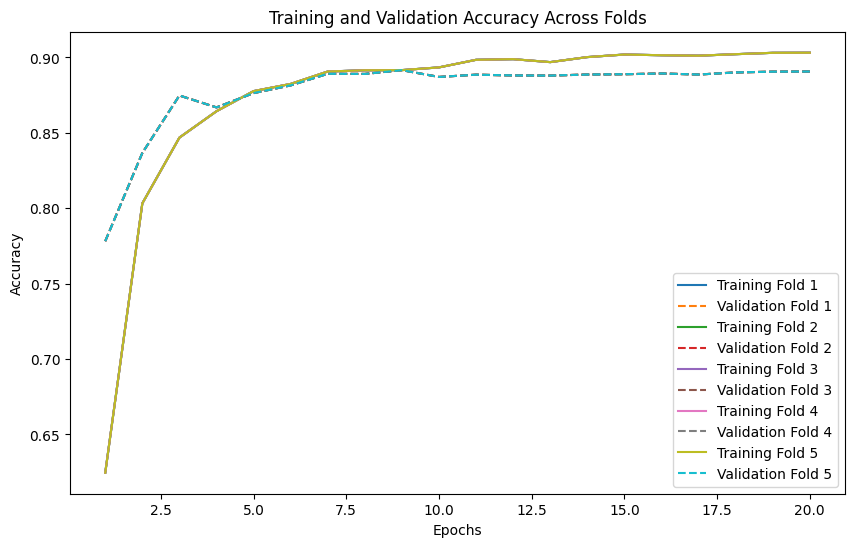

In [138]:
# Plot accuracy data
epochs = range(1, 21)  # 20 epochs
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(epochs, train_accs[i], label=f'Training Fold {i+1}')
    plt.plot(epochs, val_accs[i], label=f'Validation Fold {i+1}', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Across Folds')
plt.legend()
plt.show()

In [146]:
# Find optimal epoch

# Retrieve validation accuracy data
val_acc = model_val_results.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_acc) + 1  # Add 1 because epoch indices start from 1

print("Epoch with the highest validation accuracy:", best_epoch)
print("Highest Accuracy:", np.max(val_acc))

Epoch with the highest validation accuracy: 7
Highest Accuracy: 0.8838333487510681


### 8.2 Retrain optimal model on all training data 

In [142]:
print("80% Train - 20% Test")
print("\nTraining data:", X_train_val.shape)
print("Test data:", X_test.shape)
print("Training labels:", y_train_val.shape)
print("Test labels:", y_test.shape)

80% Train - 20% Test

Training data: (40000, 10000)
Test data: (10000, 10000)
Training labels: (40000,)
Test labels: (10000,)


In [143]:
final_model = models.Sequential()
final_model.add(Input(shape=(10000,)))
final_model.add(layers.Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
final_model.add(layers.Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

final_model.fit(X_train_val, y_train_val, epochs=7, batch_size=512)

Epoch 1/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7505 - loss: 0.5722
Epoch 2/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.3457
Epoch 3/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9073 - loss: 0.2969
Epoch 4/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.2774
Epoch 5/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9224 - loss: 0.2634
Epoch 6/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9239 - loss: 0.2532
Epoch 7/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.2518


### 8.3 Test

In [144]:
final_results = final_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8982 - loss: 0.2984


## 9 Conclusion:
### 9.1 Summary of the experiment and findings:
- 5.2 Baseline: accuracy: 0.8906 - loss: 0.2941
- 6.3 Scale up: accuracy: 0.8623 - loss: 0.7283
- 7.1 Simplified Network: accuracy: 0.8808 - loss: 0.3594
- 7.2 Simplified Network with Dropout (0.5): accuracy: 0.8912 - loss: 0.2814
- 7.3 Simplified Network with L2 Weight Regularization: accuracy: 0.8889 - loss: 0.3280
- 7.4 Simplified Network combined with Dropout and L2: accuracy: 0.8881 - loss: 0.3788
- 8.1 Final Model with K-fold Cross-Validation: highest accuracy: 0.8838
     - 8.3 Final Model Retrained and Tested: accuracy: 0.8982 - loss: 0.2984 

The experiments involved exploring different model architectures and techniques such as dropout and L2 regularization. The final model, retrained after optimizing with k-fold cross-validation, achieved the highest accuracy of 0.8838, demonstrating the effectiveness of the approach. However, even the test accuracy of the final model remains robust at 0.8982, indicating good generalization performance.
Considering that scaling up and adding complexity to the model only weakened performance, with the baseline model of only one output layer outperforming most of them, I think it is safe to say that this is a fairly simple dataset to work with. The balance of this dataset might not be representative of real world data so there is much more scope for developing more complex models to tackle it especially considering the dynamism of textual data. 

### 9.2 Discussion on potential improvements or further experiments.
- Further data processing specific to textual data perhaps using Natural Language Processing could significantly benefit performance.
- Other techniques could include:
    - Using Embedding layers rather than one-hot-encoding which results in high-dimensional binary vectors (sparse), with a length equal to the size of the vocabulary. On the other hand, the Embedding layer in a neural network learns dense vector representations for words in a continuous vector space. It maps each word to a dense vector of fixed size, typically much smaller than the size of the vocabulary. These dense vectors are learned during the training process and capture semantic relationships between words based on the context in which they appear. These factors could contribute to more dynamic models:
    - Representation: One-hot encoding represents words as sparse binary vectors with a length equal to the size of the vocabulary, while the Embedding layer represents words as dense vectors of fixed size.
    - Dimensionality: One-hot encoding results in high-dimensional sparse vectors, while the Embedding layer produces low-dimensional dense vectors.
    - Semantic Relationships: The Embedding layer learns continuous vector representations that capture semantic relationships between words, whereas one-hot encoding treats each word as independent and does not capture contextual information.

In NLP tasks, using the Embedding layer is generally preferred over one-hot encoding when working with large vocabularies, as it results in more efficient representations and allows the model to learn meaningful semantic relationships between words.
### 9.3 Annex
Below are the iterations of network architectures and findings as referenced in 7.1.1

In [6]:
df = pd.read_csv('NN_arch.csv')
df

,Model,Layer1 (units),Layer2,Layer3 (units),Layer4 (units),Unnamed: 5,loss,acc,epochs,batch size,Unnamed: 10
0,underfit,1,NaN,NaN,NaN,NaN,0.2941,0.8906,10.0,512.0,"training and validation loss steady decrease, ..."
1,overfit,16,8,1.0,NaN,NaN,0.7283,0.8623,15.0,512.0,NaN
2,1,16,8,1.0,NaN,NaN,1.1128,0.8612,40.0,512.0,training plateu at 20
3,2,8,8,1.0,NaN,NaN,1.1841,0.8551,40.0,512.0,training peaks too early
4,3,8,4,1.0,NaN,NaN,1.1093,0.8534,40.0,512.0,training loss steeps early
5,4,32,16,8.0,1.0,NaN,1.0724,0.8726,40.0,512.0,"slower learning, early plateu"
6,5,64,32,16.0,1.0,NaN,1.4442,0.8690,40.0,512.0,high disparity in training and validation loss
7,6,16,8,4.0,1.0,NaN,1.0656,0.8625,30.0,512.0,similar to overfit
8,7,32,16,1.0,NaN,NaN,0.6814,0.8737,30.0,512.0,fluctuations in increasing training loss after...
9,8,32,16,4.0,1.0,NaN,0.5700,0.8716,30.0,512.0,"validation loss decrease, then noisy increase(..."


## 10 References:
1. Introduction:
    - Patel, Y. A. (2022, January 4). Sentiment Analysis on IMDB Movie Review - Yash Alpeshbhai Patel - Medium. Medium. https://medium.com/@pyashpq56/sentiment-analysis-on-imdb-movie-review-d004f3e470bd
    - Team, K. (n.d.). Keras documentation: IMDB movie review sentiment classification dataset. https://keras.io/api/datasets/imdb/
2. Evaluation Metric:
    - Shung, K. P. (2020, April 10). Accuracy, precision, recall or F1? - towards data science. Medium. https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
    - Singh, V. (2023, October 17). ROC-AUC vs Accuracy: Which Metric Is More Important? - Shiksha Online. Shiksha.com. https://www.shiksha.com/online-courses/articles/roc-auc-vs-accuracy/#What-is-Accuracy
3. Evaluation Protocol
    - Holdouts and Cross Validation: Why the Data Used to Evaluate your Model Matters. (2022, October 7). Maveryx Community. https://community.alteryx.com/t5/Data-Science/Holdouts-and-Cross-Validation-Why-the-Data-Used-to-Evaluate-your/ba-p/448982
    - Ugalmogale, A. (2022, December 21). How much minimum data do we need ? https://www.linkedin.com/pulse/how-much-minimum-data-do-we-need-akshay-ugalmogale/
4. Model Architecture and Performance Framework
   - Nair, A. (2022, April 9). Baseline Models: Your Guide for Model Building - towards Data science. Medium. https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d
   - Mudadla, S. (2023, October 31). What is the difference between Loss function and Metrics in Machine Learning? Medium. https://medium.com/@sujathamudadla1213/what-is-the-difference-between-loss-function-and-metrics-in-machine-learning-3fea45d5882b
   - Brownlee, J. (2019, August 6). How to use Learning Curves to Diagnose Machine Learning Model Performance. MachineLearningMastery.com. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
   - W&B. (2024, March 10). Weights & biases. W&B. https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0#1.-low-training-loss,-high-validation-loss
   - Brownlee, J. (2021, January 12). Gentle introduction to the ADAM Optimization Algorithm for deep learning. MachineLearningMastery.com. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
5. Build Baseline Model
   - Brownlee, J. (2022b, August 5). Binary Classification Tutorial with the Keras Deep Learning Library. MachineLearningMastery.com. https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
   - Raj, R. (2021, December 15). Binary Classification of IMDB movie Reviews - towards data science. Medium. https://towardsdatascience.com/binary-classification-of-imdb-movie-reviews-648342bc70dd
7. Regularisation
    - Higher validation accuracy, than training accurracy using Tensorflow and Keras. (n.d.). Stack Overflow. https://stackoverflow.com/questions/43979449/higher-validation-accuracy-than-training-accurracy-using-tensorflow-and-keras
9. Conclusion
    - Word Embedding and Sentiment Analysis (IMDB). (n.d.). The Data Frog. https://thedatafrog.com/en/articles/word-embedding-sentiment-analysis/ 
- Chollet, F. (2019, March 1). Chapter 3. Getting started with neural networks. https://livebook.manning.com/book/deep-learning-with-python/chapter-3
- Chollet, F. (2019b, March 1). Chapter 4. Fundamentals of machine learning. https://livebook.manning.com/book/deep-learning-with-python/chapter-4